In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

In [13]:
df = pd.read_csv('/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/monthly_results/all_months_summary.csv')

In [4]:
# df.head(37)


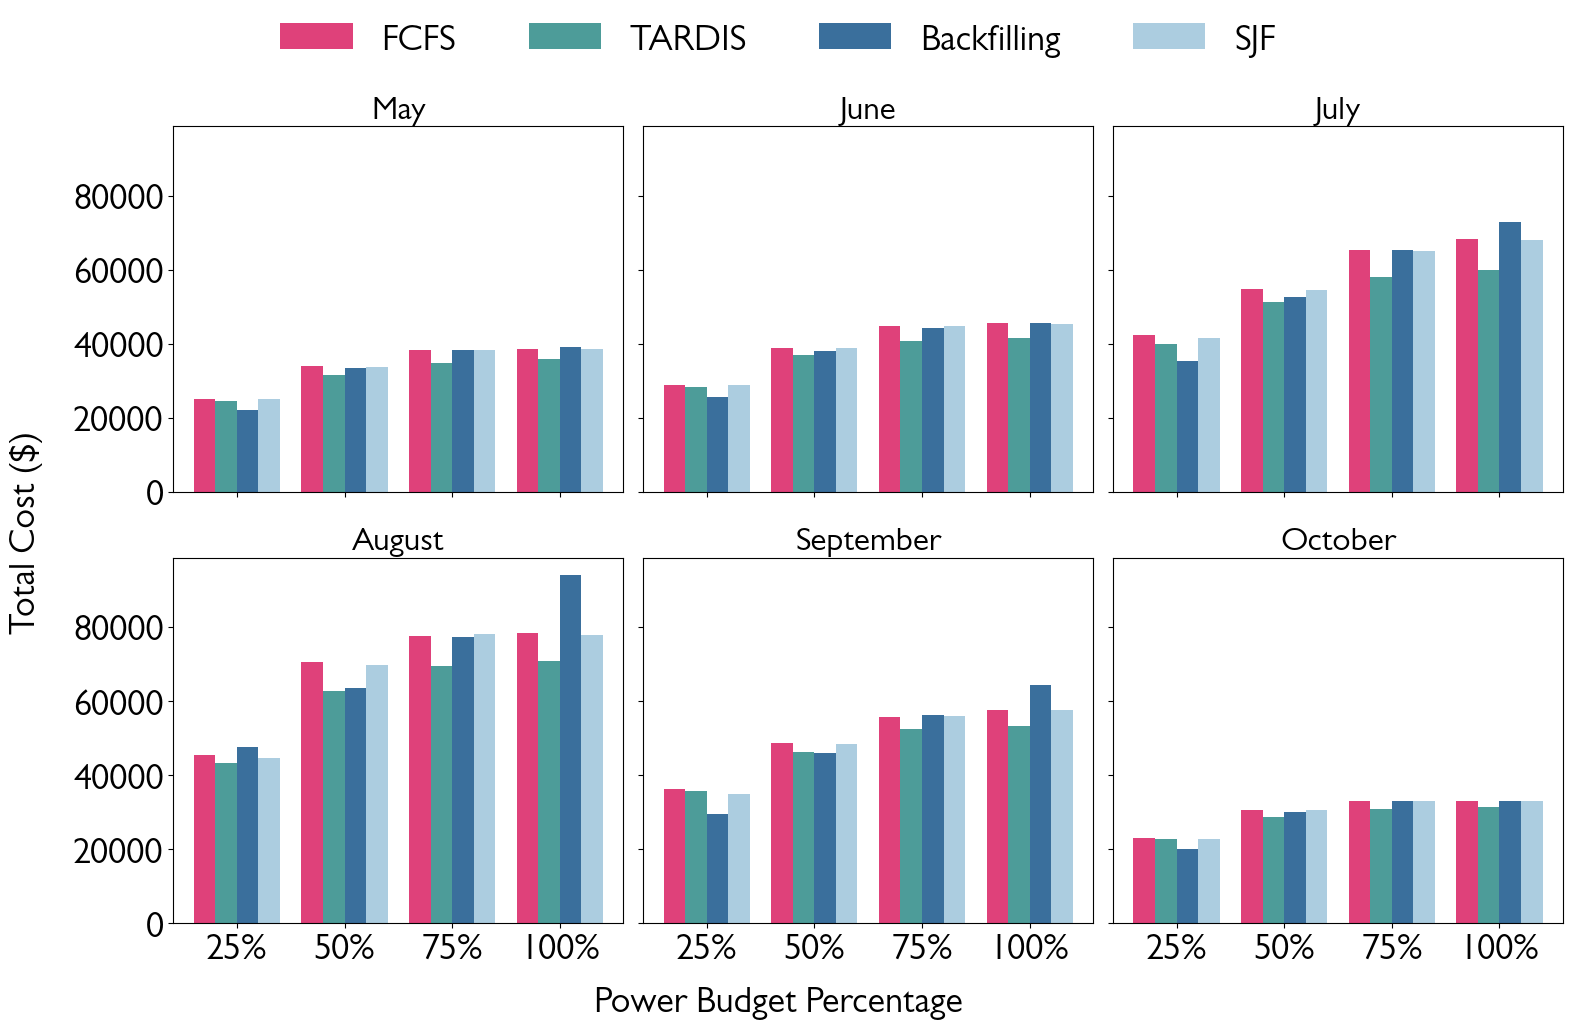

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Read the CSV file
df = pd.read_csv('/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/monthly_results/all_months_summary.csv')

# Create month order mapping for proper sorting
month_order = {
    'may': 0, 
    'june': 1, 
    'july': 2, 
    'august': 3, 
    'september': 4, 
    'october': 5
}

# Extract relevant columns for plotting
df_filtered = df[['month', 'power_budget_percentage', 'fcfs_total_cost', 
                 'enhanced_total_cost', 'celf_total_cost', 'sjf_total_cost']]

# Group by month and power budget percentage, then sum costs
df_grouped = df_filtered.groupby(['month', 'power_budget_percentage']).sum().reset_index()

# Sort months chronologically
df_grouped['month_order'] = df_grouped['month'].map(month_order)
df_grouped = df_grouped.sort_values(['month_order', 'power_budget_percentage'])

# Get unique months and power budget percentages
months = sorted(df_grouped['month'].unique(), key=lambda x: month_order[x])
power_budgets = sorted(df_grouped['power_budget_percentage'].unique())
num_power_budgets = len(power_budgets)

# Define bar width and plot layout
bar_width = 0.2
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)

axes = axes.flatten()

# Define schedulers and colors
schedulers = ['fcfs_total_cost', 'enhanced_total_cost', 'celf_total_cost', 'sjf_total_cost']
colors = ['#d81159', '#218380', '#084b83', '#98c1d9']
labels = ['FCFS', 'TARDIS', 'Backfilling', 'SJF']

# Plot each month's data separately
for idx, month in enumerate(months):
    ax = axes[idx]
    month_data = df_grouped[df_grouped['month'] == month].sort_values('power_budget_percentage')
    
    x = np.arange(len(power_budgets))  # X-axis positions

    for i, (scheduler, label) in enumerate(zip(schedulers, labels)):
        ax.bar(x + i * bar_width, month_data[scheduler], 
               bar_width, label=label, color=colors[i], alpha=0.8)
    
    ax.set_title(f"{month.capitalize()}", fontsize=24)
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=24)
    
    ax.tick_params(axis='both', labelsize=26)

# Add a common x-axis label for Power Budget Percentage
fig.text(0.5, 0.02, 'Power Budget Percentage', ha='center', fontsize=26)

# Add a common y-axis label
fig.text(0.02, 0.5, 'Total Cost ($)', va='center', rotation='vertical', fontsize=26)

# Add a common legend outside the subplots
fig.legend(labels, loc='upper center', ncol=4, fontsize=26, 
          bbox_to_anchor=(0.5, 1.04), frameon=False, edgecolor='#70d6ff')

# Adjust layout for better readability
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.savefig("total_cost.pdf", bbox_inches='tight')
plt.show()


# Figure to be included in the proposal

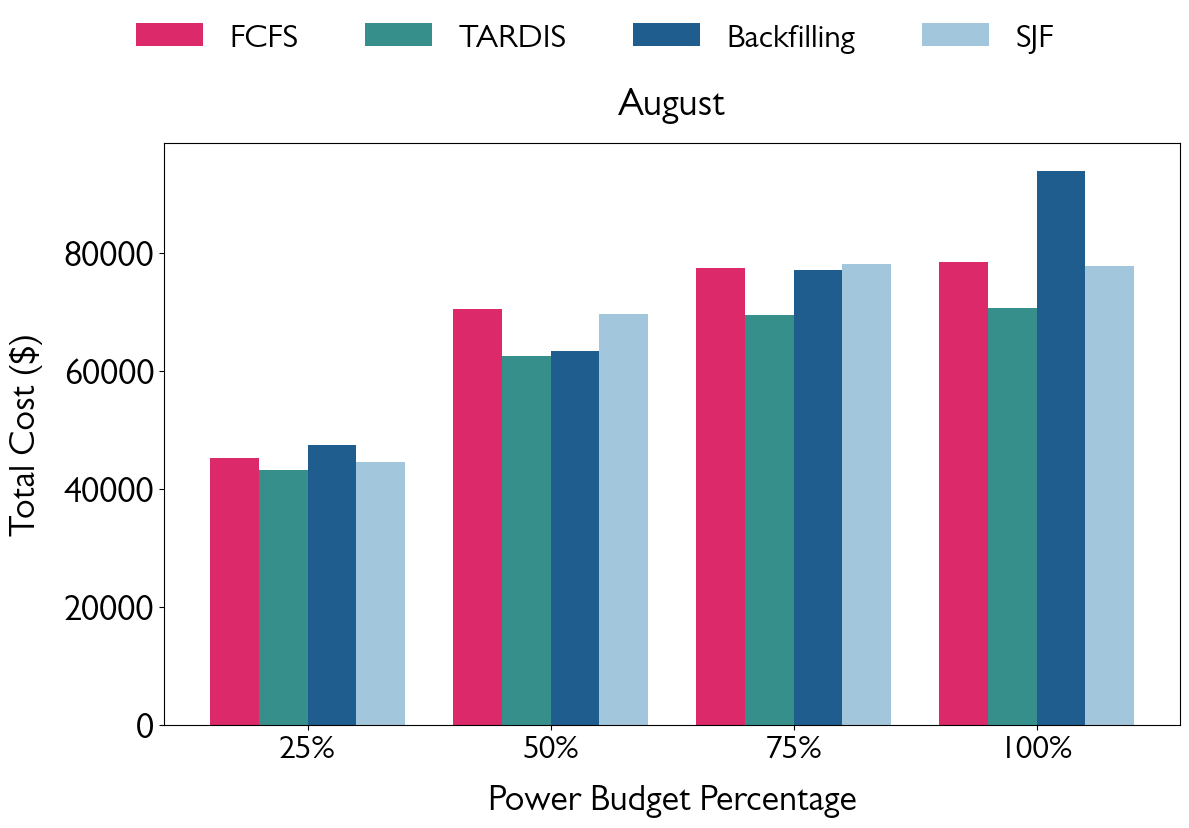

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# Set the font to Gill Sans, if available on your system.
# If not available, matplotlib will fall back to a default font.
try:
    plt.rcParams['font.family'] = 'Gill Sans'
except:
    print("Gill Sans font not found, using default.")

# Data for the month of August, extracted from the provided image.
# In a real scenario, you would filter your DataFrame like:
df_august = df[df['simulation_start'] == '2020-08-01']
# data = """
# power_budget_percentage,fcfs_total_cost,enhanced_total_cost,celf_total_cost,sjf_total_cost
# 100,78435.5915260663,70783.95556205468,94015.4226931785,77852.2030226484
# 75,77480.3625265062,69560.69944572692,77187.5759487326,78196.2673404274
# 50,70538.0300274278,62593.22353919793,63504.2477457217,69757.9447538238
# 25,45317.1921491959,43326.53340346194,47503.257858434,44681.4554171311
# """

# # Read the data into a pandas DataFrame
# df_august = pd.read_csv(io.StringIO(data))

# Sort the data by power budget percentage in ascending order for plotting
df_august = df_august.sort_values('power_budget_percentage').reset_index(drop=True)

# Define schedulers, labels, and colors for the plot
schedulers = ['fcfs_total_cost', 'enhanced_total_cost', 'celf_total_cost', 'sjf_total_cost']
labels = ['FCFS', 'TARDIS', 'Backfilling', 'SJF']
colors = ['#d81159', '#218380', '#084b83', '#98c1d9']

# Get the unique power budget percentages
power_budgets = df_august['power_budget_percentage'].unique()

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and x-axis positions
bar_width = 0.2
x = np.arange(len(power_budgets))

# Plot bars for each scheduler
for i, (scheduler, label) in enumerate(zip(schedulers, labels)):
    ax.bar(x + i * bar_width, df_august[scheduler], 
           bar_width, label=label, color=colors[i], alpha=0.9)

# Set titles and labels with specified font sizes
ax.set_title("August", fontsize=28, pad=20)
ax.set_ylabel('Total Cost ($)', fontsize=26, labelpad=15)
ax.set_xlabel('Power Budget Percentage', fontsize=26, labelpad=15)

# Set x-axis ticks and labels
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=24)

# Set y-axis tick label size
ax.tick_params(axis='y', labelsize=26)

# Create a shared legend above the plot
fig.legend(labels, loc='upper center', ncol=4, fontsize=24,
           bbox_to_anchor=(0.5, 1.05), frameon=False)

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure to a file and display it
plt.savefig("august_total_cost.pdf", bbox_inches='tight')
plt.show()

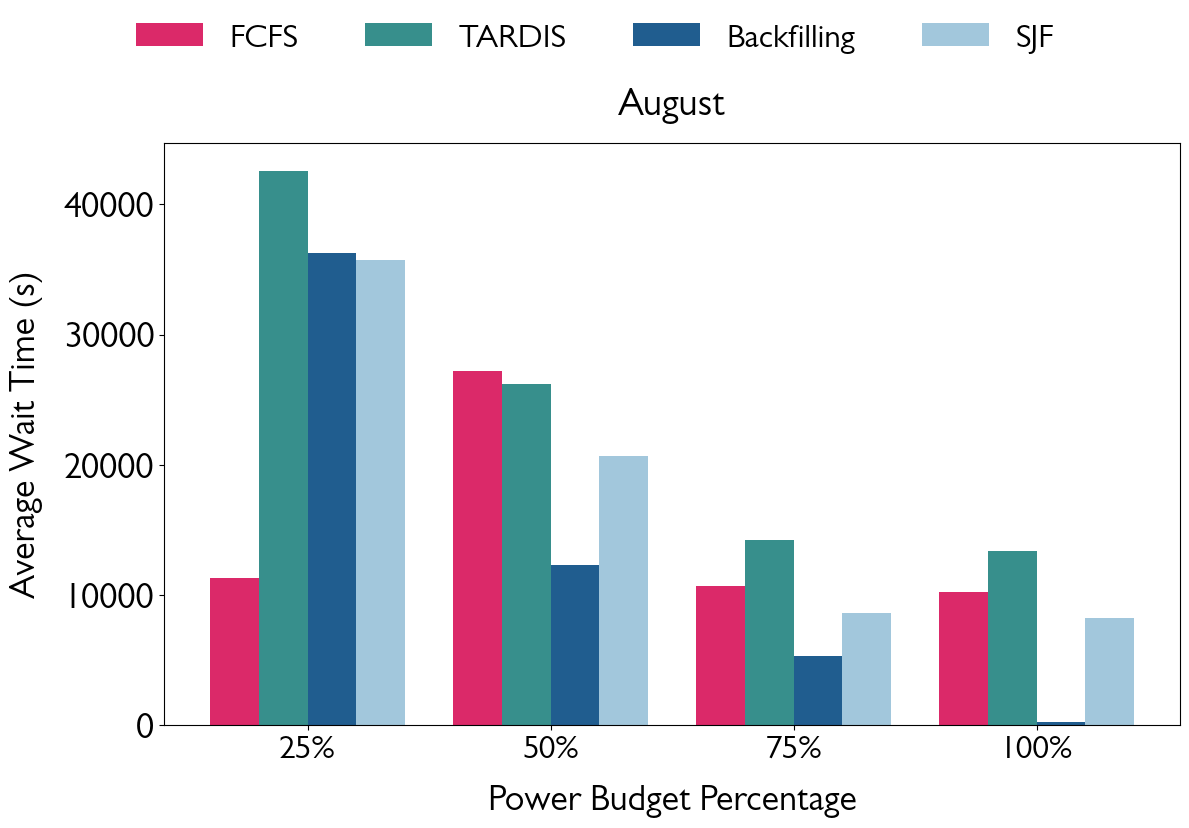

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# Set the font to Gill Sans, if available on your system.
# If not available, matplotlib will fall back to a default font.
try:
    plt.rcParams['font.family'] = 'Gill Sans'
except:
    print("Gill Sans font not found, using default.")

# Data for August's average wait times, extracted from the provided image.
data = """
power_budget_percentage,fcfs_avg_wait,enhanced_avg_wait,celf_avg_wait,sjf_avg_wait
100,10213.2900099225,13390.1845789949,283.557800603786,8276.60929659828
75,10706.4639241226,14229.3634826896,5354.96502271209,8657.57108294453
50,27179.2205939639,26214.1489152575,12353.9993157028,20691.6107996822
25,11294.662510125,42596.654346538,36274.3659548074,35692.8245340719
"""

# Read the data into a pandas DataFrame
df_august_wait = pd.read_csv(io.StringIO(data))

# Sort the data by power budget percentage for consistent plotting
df_august_wait = df_august_wait.sort_values('power_budget_percentage').reset_index(drop=True)

# Define schedulers, labels, and colors for the plot
schedulers = ['fcfs_avg_wait', 'enhanced_avg_wait', 'celf_avg_wait', 'sjf_avg_wait']
labels = ['FCFS', 'TARDIS', 'Backfilling', 'SJF']
colors = ['#d81159', '#218380', '#084b83', '#98c1d9']

# Get the unique power budget percentages
power_budgets = df_august_wait['power_budget_percentage'].unique()

# --- Plotting ---
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and x-axis positions
bar_width = 0.2
x = np.arange(len(power_budgets))

# Plot bars for each scheduler's average wait time
for i, (scheduler, label) in enumerate(zip(schedulers, labels)):
    ax.bar(x + i * bar_width, df_august_wait[scheduler], 
           bar_width, label=label, color=colors[i], alpha=0.9)

# Set titles and labels with specified font sizes
ax.set_title("August", fontsize=28, pad=20)
ax.set_ylabel('Average Wait Time (s)', fontsize=26, labelpad=15)
ax.set_xlabel('Power Budget Percentage', fontsize=26, labelpad=15)

# Set x-axis ticks and labels
ax.set_xticks(x + bar_width * 1.5)
ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=24)

# Set y-axis tick label size
ax.tick_params(axis='y', labelsize=26)

# Create a shared legend above the plot
fig.legend(labels, loc='upper center', ncol=4, fontsize=24,
           bbox_to_anchor=(0.5, 1.05), frameon=False)

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure to a file and display it
plt.savefig("august_average_wait_time.pdf", bbox_inches='tight')
plt.show()

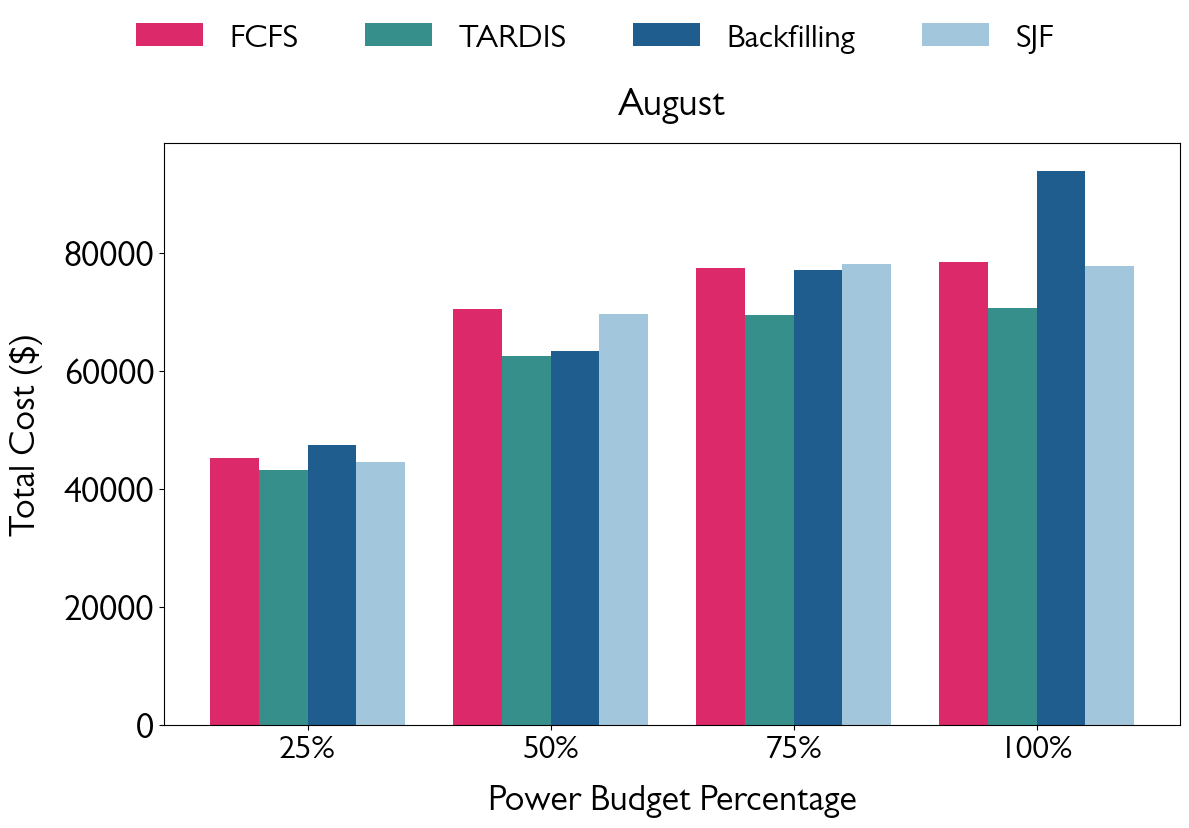

Plot saved as 'august_total_cost.pdf'


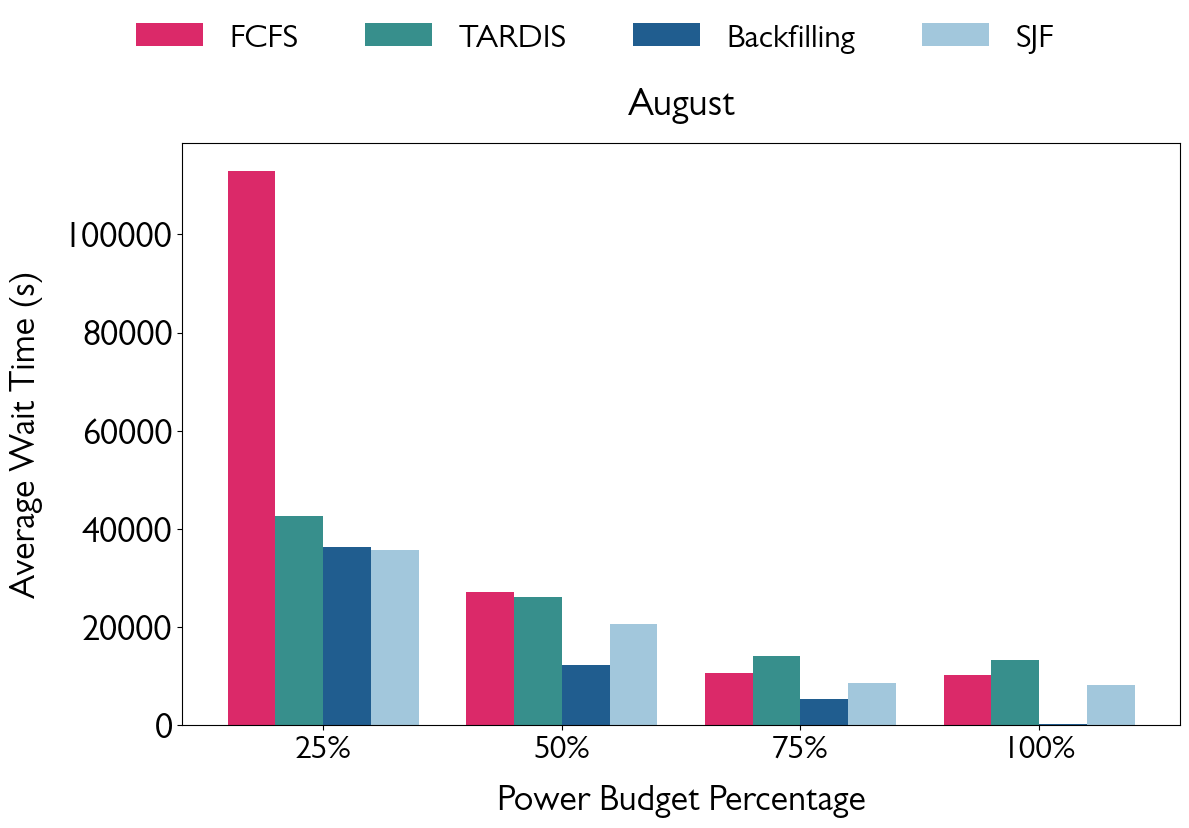

Plot saved as 'august_avg_wait.pdf'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

def plot_monthly_data(df, month_name, value_type, y_label, output_filename):
    """
    Generates and saves a bar chart for a specific month and data type.

    Args:
        df (pd.DataFrame): The DataFrame containing all monthly data.
        month_name (str): The month to filter and plot (e.g., 'august').
        value_type (str): The type of metric to plot ('total_cost' or 'avg_wait').
        y_label (str): The label for the Y-axis.
        output_filename (str): The filename for the saved plot.
    """
    # Filter data for the selected month (using lowercase 'month')
    month_data = df[df['month'] == month_name].sort_values('power_budget_percentage').reset_index()
    
    # Check if data for the selected month exists
    if month_data.empty:
        print(f"Error: No data found for the month '{month_name}'. Please check the name.")
        available_months = df['month'].unique()
        if len(available_months) > 0:
            print("Available months are: " + ", ".join(available_months))
        else:
            print("No months were found in the 'month' column. Please check the data loading and column creation steps.")
        return

    # Set the font to Gill Sans, if available on your system.
    try:
        plt.rcParams['font.family'] = 'Gill Sans'
    except RuntimeError:
        print("Gill Sans font not found, using default.", file=sys.stderr)

    # --- Plotting Setup ---
    fig, ax = plt.subplots(figsize=(12, 8))
    
    schedulers = [f'fcfs_{value_type}', f'enhanced_{value_type}', f'celf_{value_type}', f'sjf_{value_type}']
    labels = ['FCFS', 'TARDIS', 'Backfilling', 'SJF']
    colors = ['#d81159', '#218380', '#084b83', '#98c1d9']
    
    power_budgets = month_data['power_budget_percentage'].unique()
    bar_width = 0.2
    x = np.arange(len(power_budgets))

    # --- Create Bars ---
    for i, (scheduler_col, label) in enumerate(zip(schedulers, labels)):
        ax.bar(x + i * bar_width, month_data[scheduler_col], 
               bar_width, label=label, color=colors[i], alpha=0.9)

    # --- Formatting ---
    ax.set_title(month_name.capitalize(), fontsize=28, pad=20)
    ax.set_ylabel(y_label, fontsize=26, labelpad=15)
    ax.set_xlabel('Power Budget Percentage', fontsize=26, labelpad=15)
    
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=24)
    ax.tick_params(axis='y', labelsize=26)
    
    fig.legend(labels, loc='upper center', ncol=4, fontsize=24,
               bbox_to_anchor=(0.5, 1.05), frameon=False)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # --- Save and Show ---
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()
    print(f"Plot saved as '{output_filename}'")


# --- Main Execution ---
if __name__ == "__main__":
    try:
        # Load the CSV file
        file_path = '/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/monthly_results/all_months_summary.csv'
        df_full = pd.read_csv(file_path)

        # Check for 'simulation_start' column before using it
        if 'simulation_start' in df_full.columns:
             # Create a 'month' column for easy filtering
            df_full['simulation_start'] = pd.to_datetime(df_full['simulation_start'])
            df_full['month'] = df_full['simulation_start'].dt.strftime('%B').str.lower()
        
        elif 'month' in df_full.columns:
            df_full['month'] = df_full['month'].str.lower()
        else:
            print("Error: DataFrame must contain either a 'simulation_start' or a 'month' column.")
            sys.exit()

       
        # ==  CHANGE THIS VARIABLE TO SELECT THE DESIRED MONTH  ==      
        selected_month = 'august'
        

        # --- Generate Plot for Total Cost ---
        plot_monthly_data(
            df=df_full,
            month_name=selected_month,
            value_type='total_cost',
            y_label='Total Cost ($)',
            output_filename=f'{selected_month}_total_cost.pdf'
        )
        
        # --- Generate Plot for Average Wait Time ---
        plot_monthly_data(
            df=df_full,
            month_name=selected_month,
            value_type='avg_wait',
            y_label='Average Wait Time (s)',
            output_filename=f'{selected_month}_avg_wait.pdf'
        )

    except FileNotFoundError:
        print(f"Error: The file was not found at the specified path.")
        print("Please make sure this path is correct:")
        print(f"'{file_path}'")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

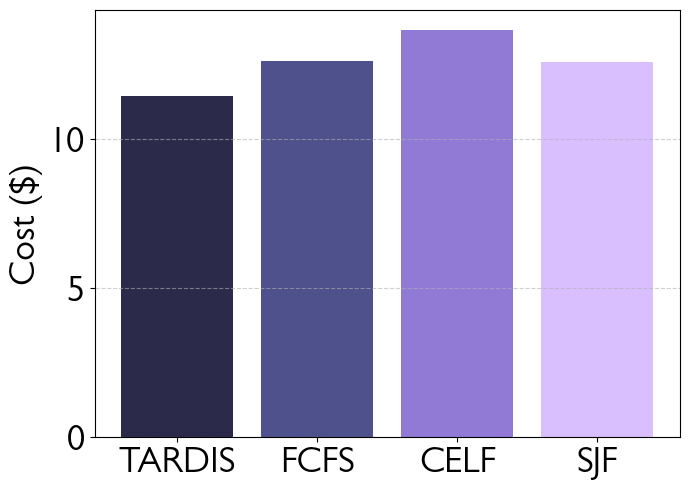

In [7]:
# Re-import necessary libraries since execution state was reset
import matplotlib.pyplot as plt

# Data for Average Cost per Job
schedulers = ['TARDIS','FCFS', 'CELF', 'SJF']  # Replacing ENHANCED with TARDIS
avg_cost_per_job = [11.46, 12.61, 13.65, 12.58]

# Define colors for the bars
colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 5))

# Plot bar chart
ax.bar(schedulers, avg_cost_per_job, color=colors)

# Labels and formatting
# ax.set_title('Average Cost per Job', fontsize=26)
ax.set_ylabel('Cost ($)', fontsize=26)
ax.tick_params(axis='x', labelsize=26)
ax.tick_params(axis='y', labelsize=26)
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.savefig("avg_cost_per_job.pdf", bbox_inches='tight')
plt.show()


/tmp/ipykernel_22618/2679689798.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = df_filtered[col] / 60


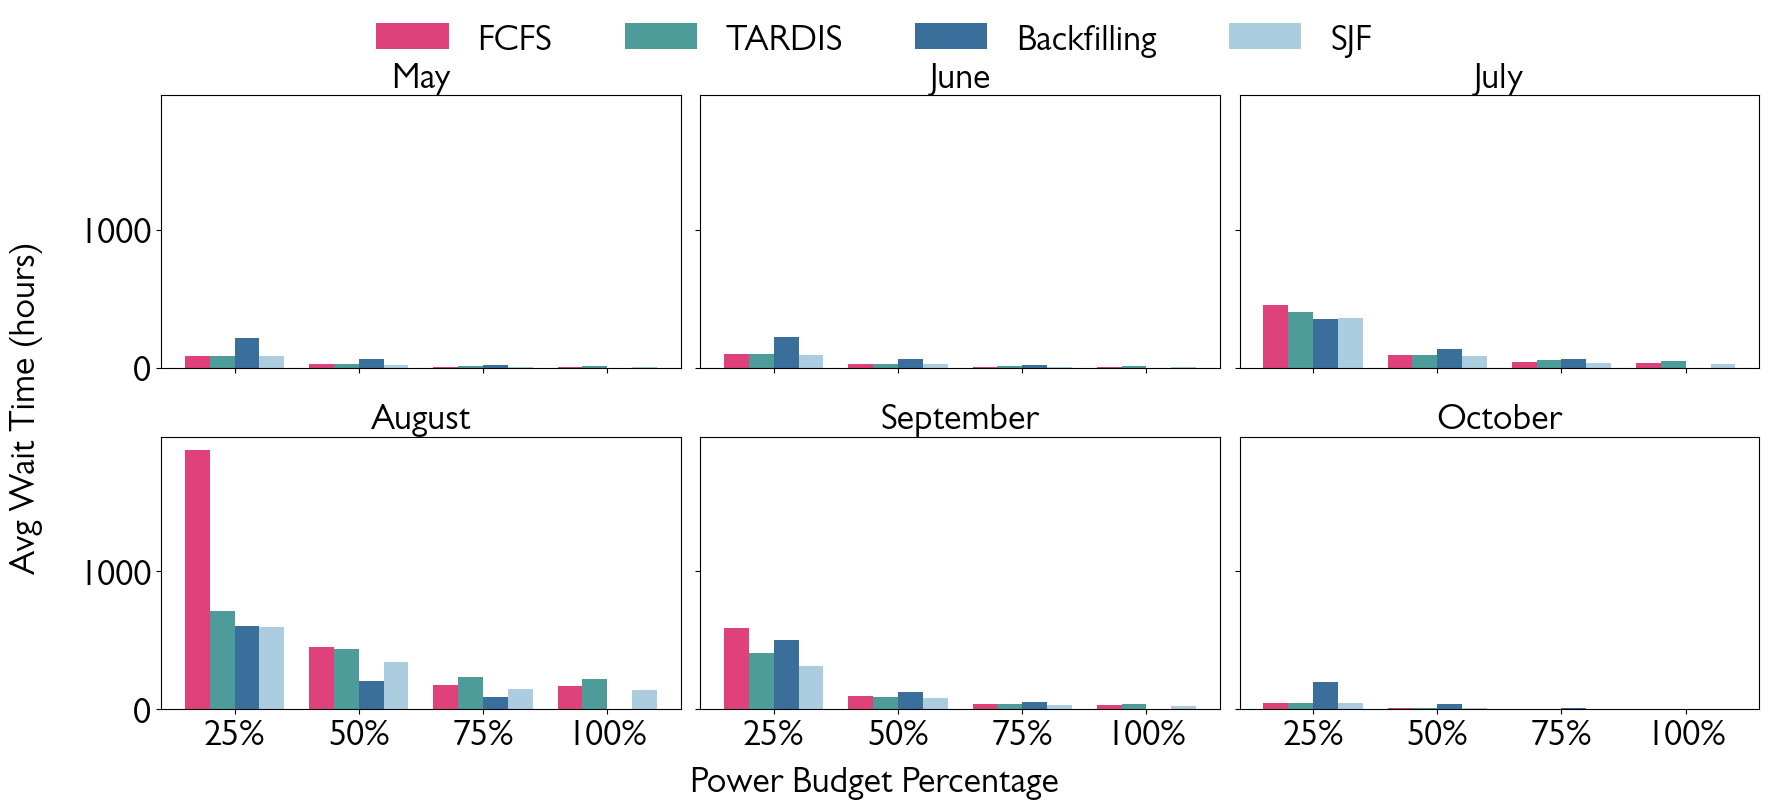

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Create month order mapping for proper sorting
month_order = {
    'may': 0, 
    'june': 1, 
    'july': 2, 
    'august': 3, 
    'september': 4, 
    'october': 5
}

# Extract relevant columns for plotting average wait times
df_filtered = df[['month', 'power_budget_percentage', 'fcfs_avg_wait', 
                 'enhanced_avg_wait', 'celf_avg_wait', 'sjf_avg_wait']]

# Convert wait times from minutes to hours
wait_time_columns = ['fcfs_avg_wait', 'enhanced_avg_wait', 'celf_avg_wait', 'sjf_avg_wait']
for col in wait_time_columns:
    df_filtered[col] = df_filtered[col] / 60

# Group by month and power budget percentage, then aggregate
df_grouped = df_filtered.groupby(['month', 'power_budget_percentage']).sum().reset_index()

# Sort months chronologically
df_grouped['month_order'] = df_grouped['month'].map(month_order)
df_grouped = df_grouped.sort_values(['month_order', 'power_budget_percentage'])

# Get unique months and power budget percentages
months = sorted(df_grouped['month'].unique(), key=lambda x: month_order[x])
power_budgets = sorted(df_grouped['power_budget_percentage'].unique())
num_power_budgets = len(power_budgets)

# Define bar width and plot layout
bar_width = 0.2
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Define schedulers and colors
schedulers = ['fcfs_avg_wait', 'enhanced_avg_wait', 'celf_avg_wait', 'sjf_avg_wait']
colors = ['#d81159', '#218380', '#084b83', '#98c1d9']
labels = ['FCFS', 'TARDIS', 'Backfilling', 'SJF']

# Plot each month's data separately
for idx, month in enumerate(months):
    ax = axes[idx]
    month_data = df_grouped[df_grouped['month'] == month].sort_values('power_budget_percentage')
    
    x = np.arange(len(power_budgets))  # X-axis positions

    for i, (scheduler, label) in enumerate(zip(schedulers, labels)):
        ax.bar(x + i * bar_width, month_data[scheduler], 
               bar_width, label=label, color=colors[i], alpha=0.8)
    
    ax.set_title(f"{month.capitalize()}", fontsize=26)
    ax.set_xticks(x + bar_width * 1.5)
    ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=26)
    
    ax.tick_params(axis='both', labelsize=26)

# Add a common x-axis label for Power Budget Percentage
fig.text(0.5, 0.02, 'Power Budget Percentage', ha='center', fontsize=26)

# Add a common y-axis label
fig.text(0.02, 0.5, 'Avg Wait Time (hours)', va='center', rotation='vertical', fontsize=26)

# Add a common legend outside the subplots
fig.legend(labels, loc='upper center', ncol=4, fontsize=26, 
          bbox_to_anchor=(0.5, 1.02), frameon=False, edgecolor='#70d6ff')

# Adjust layout for better readability
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.savefig("wait_time_hours.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_22618/1634785184.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['enhanced_improvement'] = ((df_filtered['fcfs_avg_wait'] - df_filtered['enhanced_avg_wait']) /
/tmp/ipykernel_22618/1634785184.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['celf_improvement'] = ((df_filtered['fcfs_avg_wait'] - df_filtered['celf_avg_wait']) /
/tmp/ipykernel_22618/1634785184.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

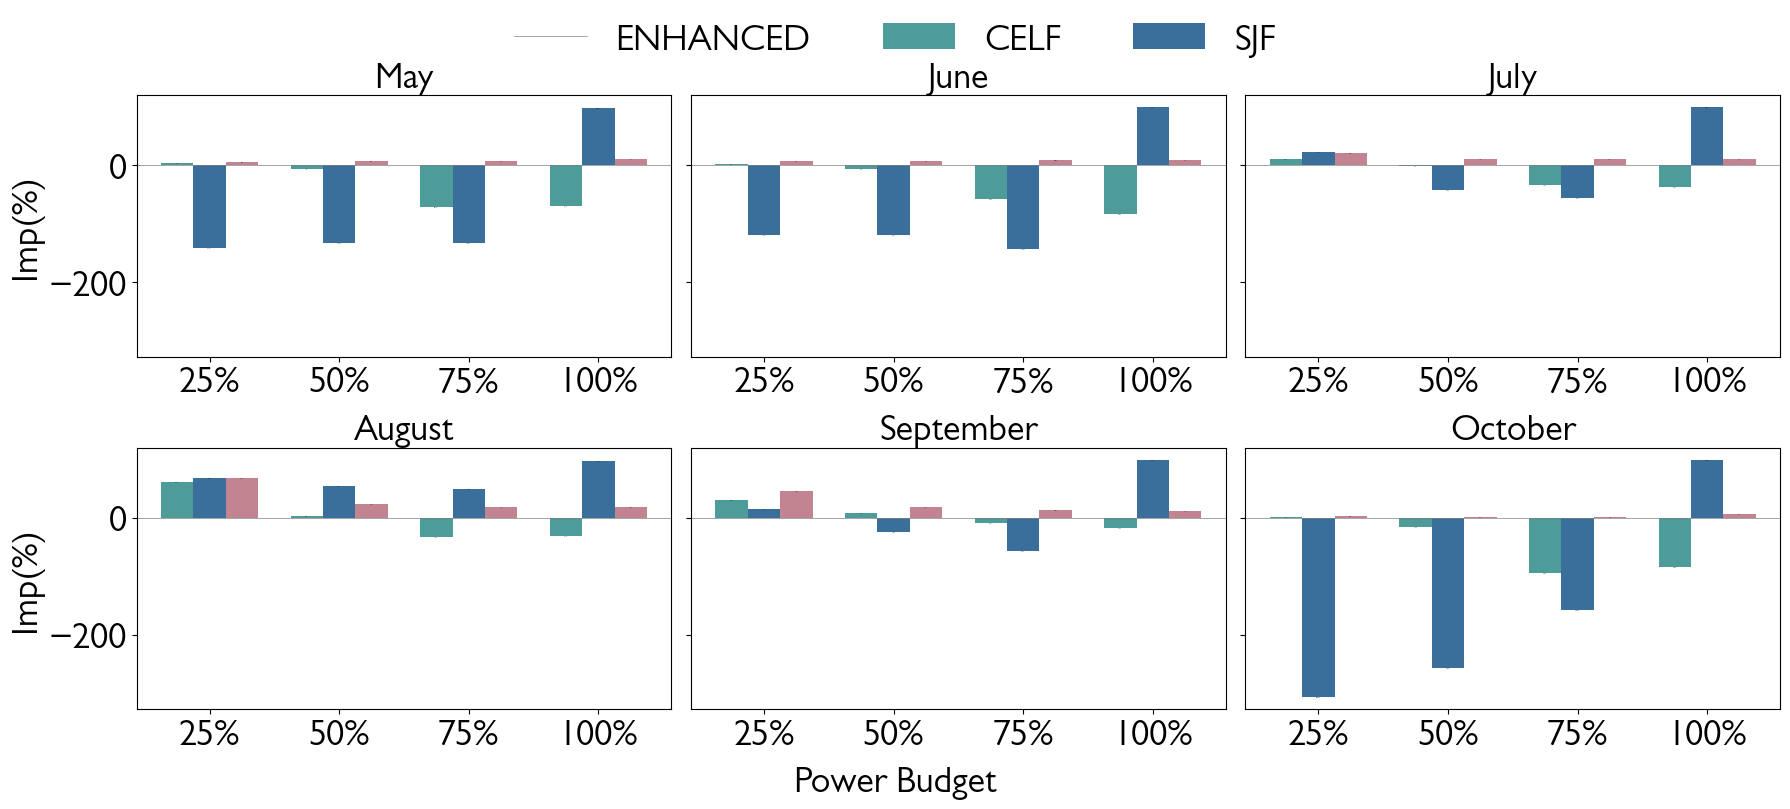

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Read the CSV file
# df = pd.read_csv('all_months_summary.csv')

# Create month order mapping for proper sorting
month_order = {
    'may': 0, 
    'june': 1, 
    'july': 2, 
    'august': 3, 
    'september': 4, 
    'october': 5
}

# Extract relevant columns for plotting average wait times
df_filtered = df[['month', 'power_budget_percentage', 'fcfs_avg_wait', 
                 'enhanced_avg_wait', 'celf_avg_wait', 'sjf_avg_wait']]

# Calculate percentage improvements relative to FCFS
df_filtered['enhanced_improvement'] = ((df_filtered['fcfs_avg_wait'] - df_filtered['enhanced_avg_wait']) / 
                                     df_filtered['fcfs_avg_wait'] * 100)
df_filtered['celf_improvement'] = ((df_filtered['fcfs_avg_wait'] - df_filtered['celf_avg_wait']) / 
                                 df_filtered['fcfs_avg_wait'] * 100)
df_filtered['sjf_improvement'] = ((df_filtered['fcfs_avg_wait'] - df_filtered['sjf_avg_wait']) / 
                                df_filtered['fcfs_avg_wait'] * 100)

# Group by month and power budget percentage
df_grouped = df_filtered.groupby(['month', 'power_budget_percentage']).mean().reset_index()

# Sort months chronologically
df_grouped['month_order'] = df_grouped['month'].map(month_order)
df_grouped = df_grouped.sort_values(['month_order', 'power_budget_percentage'])

# Get unique months and power budget percentages
months = sorted(df_grouped['month'].unique(), key=lambda x: month_order[x])
power_budgets = sorted(df_grouped['power_budget_percentage'].unique())

# Define bar width and plot layout
bar_width = 0.25  # Slightly wider bars since we now have 3 instead of 4
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharey=True)
axes = axes.flatten()

# Define schedulers and colors
improvements = ['enhanced_improvement', 'celf_improvement', 'sjf_improvement']
colors = ['#218380', '#084b83', '#b56576']
labels = ['ENHANCED', 'CELF', 'SJF']

# Plot each month's data separately
for idx, month in enumerate(months):
    ax = axes[idx]
    month_data = df_grouped[df_grouped['month'] == month].sort_values('power_budget_percentage')
    
    x = np.arange(len(power_budgets))

    for i, (improvement, label) in enumerate(zip(improvements, labels)):
        values = month_data[improvement]
        bars = ax.bar(x + i * bar_width, values, 
                     bar_width, label=label, color=colors[i], alpha=0.8)
        
        # Add value labels on the bars
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.1f}%',
                   ha='center', va='bottom', rotation=0,
                   fontsize=0)
    
    ax.set_title(f"{month.capitalize()}", fontsize=26)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels([f"{pb}%" for pb in power_budgets], fontsize=26)
    
    # Add horizontal line at y=0 to show improvement/degradation boundary
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    
    if idx % 3 == 0:
        ax.set_ylabel("Imp(%)", fontsize=26)
    
    ax.tick_params(axis='both', labelsize=26)

# Add a common x-axis label for Power Budget Percentage
fig.text(0.5, 0.02, 'Power Budget', ha='center', fontsize=26)

# Add a common legend outside the subplots
fig.legend(labels, loc='upper center', ncol=3, fontsize=26, 
          bbox_to_anchor=(0.5, 1.02), frameon=False, edgecolor='#70d6ff')

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Job type analysis


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the CSV file
file_path = "/home/abrar/Desktop/Code/Temporal HPC/hpc_simulator/temporal_results/temporal_analysis_summary_pivot.csv"
df = pd.read_csv(file_path)

# Set the font to Gill Sans 
plt.rcParams['font.family'] = 'Gill Sans'

# Define color palette for schedulers
colors = {
    'FCFS': '#ff70a6',
    'ENHANCED': '#70d6ff',
    'CELF': '#ffd670',
    'SJF': '#ff9770'
}

# Define font sizes
title_fontsize = 26
label_fontsize = 26
tick_fontsize = 26
legend_fontsize = 26

# Prepare data
df["Month"] = df["Month"].str.lower()
df["Scheduler"] = df["Scheduler"].str.upper()
df["Job Size"] = df["Job Size"].str.capitalize()
df["Period"] = df["Period"].str.capitalize()

# Separate Peak and Off-Peak data
df_peak = df[df["Period"] == "Peak"]
df_offpeak = df[df["Period"] == "Off-Peak"]

# Create separate plots for Peak and Off-Peak Job Distributions
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Peak Hour Plot
ax = axes[0]
for scheduler in colors.keys():
    scheduler_data = df_peak[df_peak["Scheduler"] == scheduler].groupby("Job Size")["Jobs/Total Jobs(%)"].mean()
    ax.bar(scheduler_data.index, scheduler_data, label=scheduler, color=colors[scheduler], alpha=0.8)

ax.set_title("Peak Hour Job Distribution", fontsize=title_fontsize)
ax.set_xlabel("Job Size", fontsize=label_fontsize)
ax.set_ylabel("Jobs / Total Jobs (%)", fontsize=label_fontsize)
ax.tick_params(axis='both', labelsize=tick_fontsize)
ax.legend(title="Scheduler", fontsize=legend_fontsize)
ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Off-Peak Hour Plot
ax = axes[1]
for scheduler in colors.keys():
    scheduler_data = df_offpeak[df_offpeak["Scheduler"] == scheduler].groupby("Job Size")["Jobs/Total Jobs(%)"].mean()
    ax.bar(scheduler_data.index, scheduler_data, label=scheduler, color=colors[scheduler], alpha=0.8)

ax.set_title("Off-Peak Hour Job Distribution", fontsize=title_fontsize)
ax.set_xlabel("Job Size", fontsize=label_fontsize)
ax.tick_params(axis='both', labelsize=tick_fontsize)
ax.legend(title="Scheduler", fontsize=legend_fontsize)
ax.grid(which='both', axis='y', color='lightgrey', linestyle='dashed', zorder=0)

# Adjust layout
plt.tight_layout()
plt.show()


KeyError: 'Month'